# Uge 1: Funktioner, Partielle afledede, Gradient-vektoren

Demo af Christian Mikkelstrup og Hans Henrik Hermansen

In [1]:
from sympy import *
from dtumathtools import *
init_printing()

Velkommen tilbage efter jul og januar, og velkommen til foråret i mat1. Der kommer til at være en helt masse nyt pensum, og blandt andet en del 3D-plots! Til dette har vi udviklet ``dtumathtools``, som vil følge jer i løbet af foråret. Den indeholder ``dtuplot`` som skal bruges til at plotte, samt flere gode hjælpefunktioner. I burde have dtumathtools instaleret fra mat1a, hvis ikke så kør kommandoen

```bash
pip install dtumathtools 
```
i terminalen.


Efter dette kan resten af demoen nydes. Vi starter med noget kendt materiale, nemlig funtioner af en variabel.

## Funktioner (af en variabel)

Man kan definere funktionen $f: \mathbb{R} \to \mathbb{R}$, $f(x)=x \mathrm{e}^x$ som en Python-funktion med følgende kendte kommando:

In [2]:
def f(x):  
    return x * exp(x)

Funktionen evalueres i punktet $x=-2$ med kommandoen:

In [3]:
f(-2)

hvis numeriske værdi er:

In [4]:
f(-2).evalf()

Det er dog sjældent nødvendigt at definere funktioner ved `def`-kommandoen, og vi vil ofte blot arbejde direkte med funktions-udtrykket:

In [5]:
x = symbols('x')          # nødvendigt for at kunne bruge x som symbolsk variabel
f_expr = x * exp(x)
f_expr

som evalueres med:

In [6]:
f_expr.subs(x, -2)

Funktionen kan fx differentieres ved:

In [7]:
f_maerke = f_expr.diff(x)
f_maerke

og vi kan undersøge grænseovergange for $x \to -\infty$, $x \to \infty$ og $x \to -2$ med:

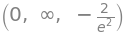

In [8]:
f_expr.limit(x, -oo), f_expr.limit(x, oo), f_expr.limit(x, -2)

Da funktionen er kontinuert overalt er det ikke overraskende at $\lim_{x \to -2} f(x) = f(-2)$.

Funktionen og den afledte plottes ved:

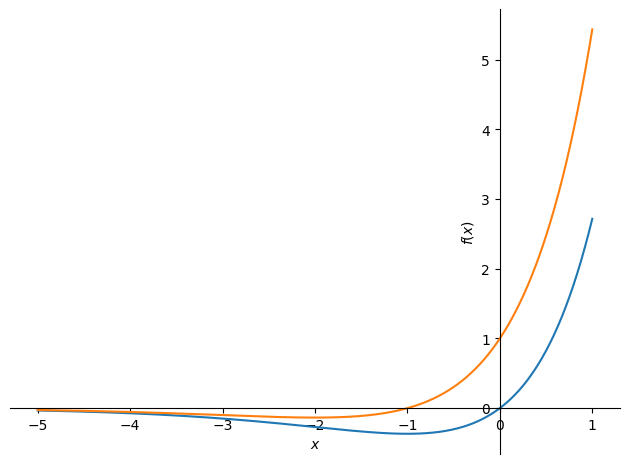

In [9]:
plot(f_expr, f_maerke, (x, -5, 1))

En lidt mere kompliceret eksempel er den stykkevis definerede funktion $g: \mathbb{R} \to \mathbb{R}$:
\begin{equation*}
    g(x) = 
    \begin{cases} 
        -x & x <0 \\
        \mathrm{e}^x & x \ge 0 
    \end{cases}
\end{equation*}

Som Python-funktion er dette:

In [10]:
def g(x):
    if x < 0:
        return -x
    else:
        return exp(x)

Igen er det dog smartere at bruge funktions-"udtrykket" i Sympy:

In [11]:
g_expr = Piecewise((-x, x < 0), (exp(x), x >= 0))

som igen evalueres ved:

In [12]:
g_expr.subs(x, -2)

og plottes ved:

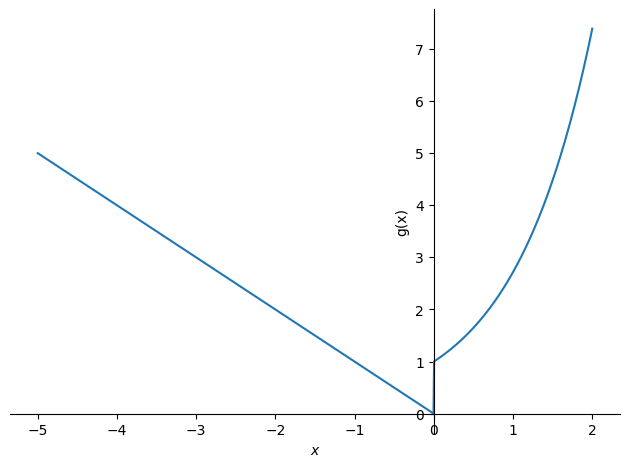

In [13]:
plot(g_expr,(x,-5,2), ylabel='g(x)')

Vi ser at funktionen ikke er kontinuert i $x=0$. Bemærk at man ikke kan bruge Python/CAS til at **bevise** at funktionen er diskontinuert i $x=0$. Dette kræver et såkaldt *epsilon-delta*-argument og her er Python/CAS ikke nyttig. Sympy vil fx gerne differentiere funktionen:

In [14]:
g_expr.diff(x)

⎧-1  for x < 0
⎪             
⎨ x           
⎪ℯ   otherwise
⎩             

men vi bør bemærke at funktionen ikke er differentiabel i $x=0$ da den ikke er kontinuert i $x=0$.

## Funktioner af flere variable: Partielt afledte ved brug af ``diff``

For funktioner af flere variable introducerer vi partielle afledte, samt hvordan vi kan benytte dem. For at vise hvordan man kan få de partielt afledte, kan vi kigge på funktionen:

In [15]:
x, y = symbols('x y')
f = x*y**2+x
f

og finde de afledte med kommandoen som vi også brugte sidste semester

In [16]:
f.diff(x), f.diff(y)

Hver af disse udtryk kan vi jo igen differentiere mht $x$ og $y$. Dette giver følgende fire funktioner:

In [17]:
f.diff(x).diff(x), f.diff(x).diff(y), f.diff(y).diff(x), f.diff(y).diff(y)

Dette kaldes de afledte *af anden orden* og kan udregnes direkte ved:

In [18]:
f.diff(x,2), f.diff(x,y), f.diff(y,x), f.diff(y,2)

Vi kan så indsætte værdier i denne, for eksempel $\frac{\partial}{\partial x}f(x,y)$ taget i $(-2,3)$ ved

In [19]:
f.diff(x).subs({x:-2,y:3})

Eller $\frac{\partial}{\partial x\partial y}f(x,y)$, taget i $(5,-13)$ ved

In [20]:
f.diff(x,y).subs({x:5,y:-13})

## Plots

### Orientering af grafer

Vi skal nu, for første gang til at plotte funktioner af flere variable, og altså i 3D! Her er et valg man skal tage, for man har nemlig mulighed for at rotere et plot rundt, så man kan se det fra flere vinkler. Hvis ikke man gør noget, så vælger dtuplot en vinkel for os, men hvis man ønsker at se grafen fra en bestemt vinkel kan ``camera`` anvendes. Prøv herunder at ændre værdierne for ``elev`` og ``azim``.

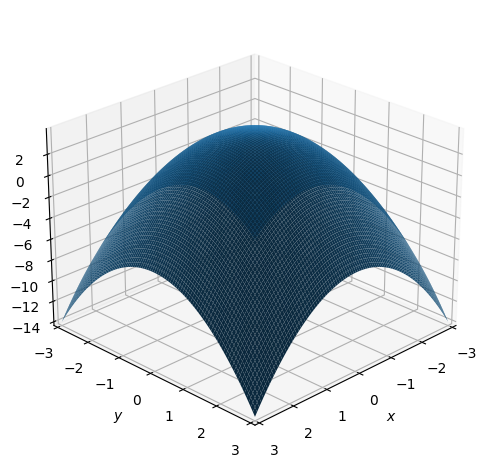

In [21]:
f = 4-x**2-y**2

p=dtuplot.plot3d(f, (x,-3,3),(y,-3,3), camera = {"elev": 25, "azim": 45})

Ovenstående kommando laver plottet som en **statisk** PNG-fil, hvilket er smart hvis man skal printe Notebook'en eller eksportere til PDF. Statiske plots fås ved ikke at gøre noget eller ved brug af ``%matplotlib inline``. 

Hvis man i stedet kører ``%matplotlib qt`` (i den følgende blok udkommenteret, men prøv at fjerne udkommenteringen \#), aktiverer man **interaktive** plots. Alle efterfølgende plots "popper" nu ud af VS Code, hvorefter man man rotere plottet rundt og se det fra flere vinkler! Prøv derefter at plotte 3D plottet igen!

In [22]:
#%matplotlib qt

### Om interaktive plots

Bemærk: `%matplotlib qt` virker normalt kun hvis man kører fx VS Code på egen laptop. Hvis man fx kører Python på en online server i browseren som Google Colab, vil `%matplotlib qt` ikke virke. Her kan man prøve widgets i stedet for: `%matplotlib ipympl`. Det kræver at man lige installerer pakken `ipympl`. Samlet oversigt:

In [23]:
# Fjern udkommentering for den backend der ønskes brugt
# %matplotlib inline        # statisk plots
# %matplotlib qt            # QT (cute) interaktivt pop-ud plots
# %matplotlib ipympl        # Widget/ipynpl interaktivt inline plots (ikke så stabil som QT og kan kræve restart af kernel)
# %matplotlib --list        # liste over alle backends  

### Æstetik

Når man vil ændre på æstetikken af et plot bruges ``rendering_kw={....}`` som argument, og det kan se lidt underligt ud. Dette er blot hvilke æstetiske (rendering) indstillinger der skal bruges, eksempelvis ``color``, ``alpha``, osv. Man kan også i det fleste tilfælde "bare" skrive ``{....}``, og så ved den godt at det er det æstetiske, men det er mere tydeligt at skrive det med.

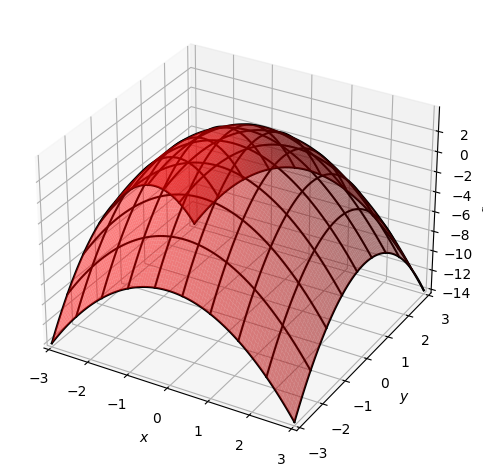

In [24]:
dtuplot.plot3d(f, (x,-3,3),(y,-3,3), wireframe = True, rendering_kw = {"color": "red", "alpha": 0.5})

Nogle æstetiske valg er dog specielle nok til at få lov til at stå alene, fx ``wireframe`` som giver grafen et gitter, eller ``use_cm`` som herunder angiver værdien i hvert punkt med en farve.

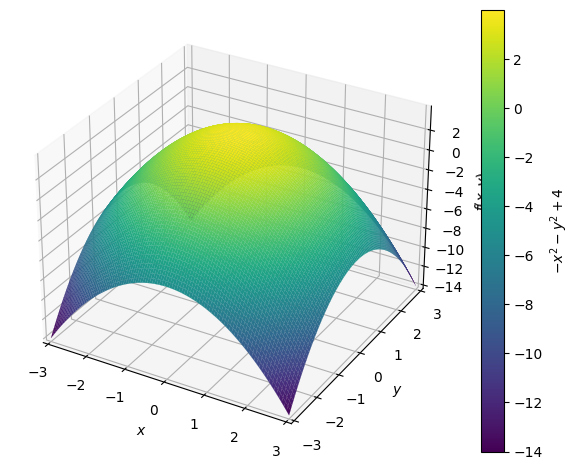

In [25]:
p=dtuplot.plot3d(f, (x,-3,3),(y,-3,3), use_cm=True, legend=True)

## Niveaukurver

Vi kan også plotte højdelinjer, altså et 2D plot over en 3D struktur ved:

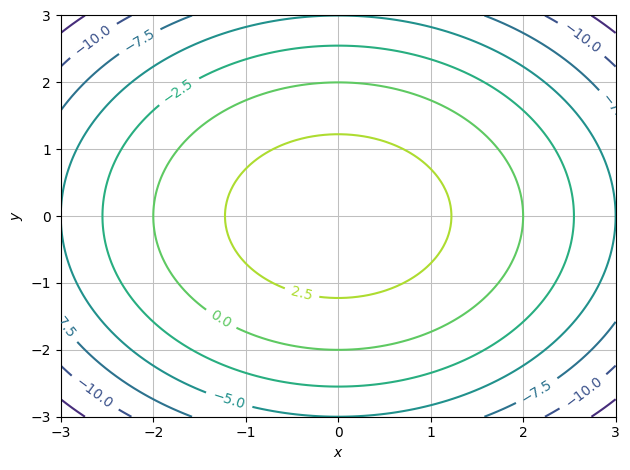

In [26]:
dtuplot.plot_contour(f, (x,-3,3),(y,-3,3), is_filled=False)

Og hvis vi vil bestemme hvilke højder der vises, kan vi bruge,

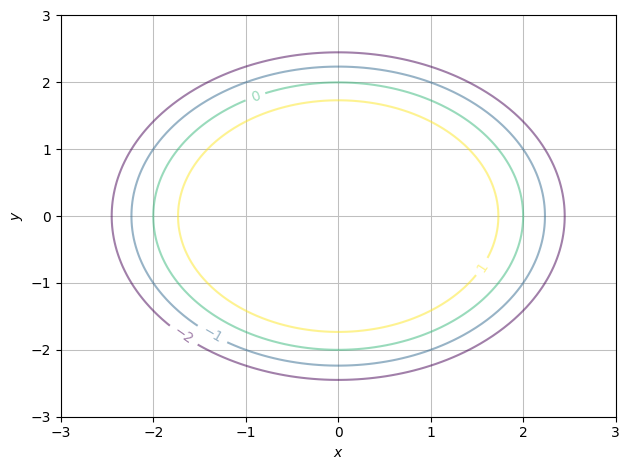

In [27]:
zvals = [-2,-1,0,1]
dtuplot.plot_contour(f, (x,-3,3),(y,-3,3), rendering_kw={"levels":zvals, "alpha":0.5}, is_filled=False)

## Gradientvektorfelter

Vi kigger nu på funktionen $f: \mathbb{R}^2 \to \mathbb{R}$: 
\begin{equation}
f(x,y)=\cos(x)+\sin(y).
\end{equation}

hvis graf i 3D visualiseres ved:

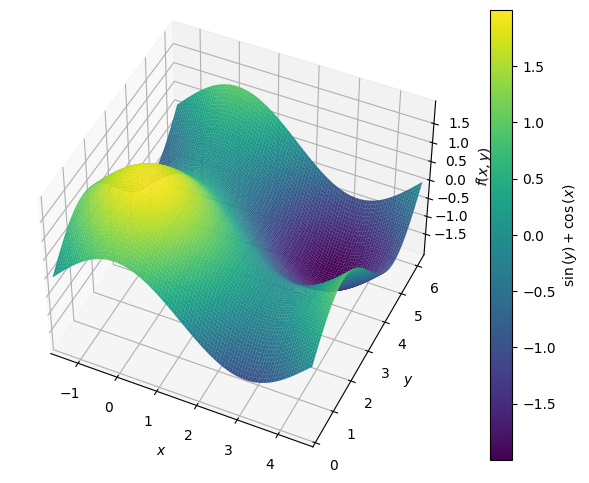

In [28]:
f = cos(x)+sin(y)
p = dtuplot.plot3d(f, (x,-pi/2,3/2*pi),(y,0,2*pi),use_cm=True, camera={"elev":45, "azim":-65}, legend=True)

Gradienten for $f$ taget i punktet $(x,y)$ er en vektor, som har symbolet $\nabla f(x,y)$ ($\nabla$ kaldes *nabla*). Den er sammensat af de to partielt afledte,

In [29]:
nf = Matrix([f.diff(x), f.diff(y)])
nf

⎡-sin(x)⎤
⎢       ⎥
⎣cos(y) ⎦

Gradienten kan også fås med ``dtutools.gradient``, bemærk dog at man med denne funktion ikke altid har magt over hvilken rækkefølge de variable tages i.

In [30]:
dtutools.gradient(f)

⎡-sin(x)⎤
⎢       ⎥
⎣cos(y) ⎦

Vi kan opfatte gradienten som en funktion $\nabla f: \mathbb{R}^2 \to \mathbb{R}^2$ (som kaldes et gradientvektorfelt), som let plottes ved:

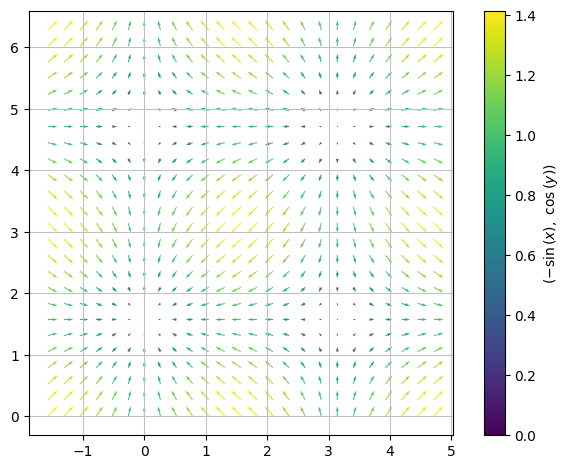

In [31]:
dtuplot.plot_vector(nf, (x,-pi/2,3/2*pi),(y,0,2*pi),scalar=False)

Eller hvis det skal være lidt flottere (her er ``rendering_kw`` splittet, så man kan specificere for pile og contours seperat),

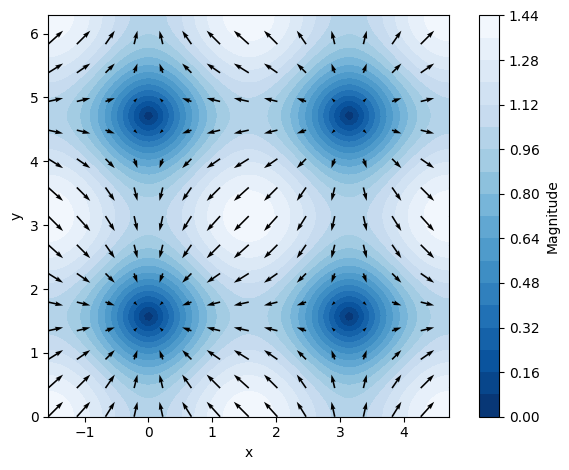

In [32]:
dtuplot.plot_vector(nf, (x,-pi/2,3/2*pi),(y,0,2*pi),
    quiver_kw={"color":"black"},
    contour_kw={"cmap": "Blues_r", "levels": 20},
    grid=False, xlabel="x", ylabel="y",n=15)